# COMPS492F Machine Learning Group Project (Topic 1)

## Abstract

Two method will be using to compare and select the most suitable machine learning approach from K-Nearest Neighbors and Naïve Bayes Classifier for predicting stroke events.

* K-fold cross validation
* 7:3 data testing

## Data Description

Stroke Prediction Dataset with patient id and 11 clinical features for predicting stroke events is show below:

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


## Data Preparation

The orginal dataset include missing values, unnecessary variable and categorical variables that will be process below:

* Using the mean of 'bmi' to replace its missing value

In [5]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

* Handle the categorical variables using label encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [7]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [8]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [9]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


* Remove unnecessary variable 'id'

In [10]:
df = df.drop('id', axis=1)

* Display processed data

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null int32
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int32
work_type            5110 non-null int32
Residence_type       5110 non-null int32
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null int32
stroke               5110 non-null int64
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.4 KB


The label of dataset is stroke(Y) and other variables(X) are used to predict stroke events.

In [13]:
X = df.drop('stroke', axis=1)
y = df['stroke']

* Split the dataset into the train and test sets in a ratio of 7 : 3

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## ML Algorithm Comparison

Using K-fold cross validation to compare 2 algorithms: K nearest neigbours (KNN) and Naive Bayes (NB). Then, carry on a model selection by observe the cross validation (CV) scores.

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

In [26]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.940117 (0.142544)
NB: 0.851468 (0.113862)


## Naïve Bayes Classifier (NB)

Apply NB approach to predict stroke:

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
trained_model = model.fit(X_train, y_train)
print('Accuracy: %f' % trained_model.score(X_test, y_test))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, trained_model.predict(X_test))

Accuracy: 0.872146


0.8721461187214612

## K-Nearest Neighbors (KNN)

Apply KNN approach to predict stroke:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[1399   59]
 [  62   13]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.18      0.17      0.18        75

    accuracy                           0.92      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



Text(0, 0.5, 'Error Rate')

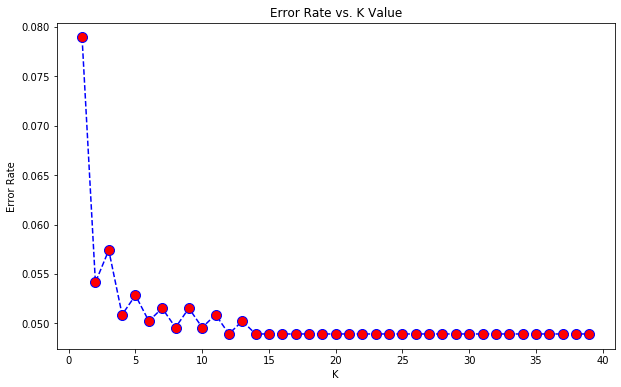

In [22]:
error_rate = []

# check the error rate for k=1 to k=40
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above figure, it shows that the error rate will trend to 0 when K is larger than 10. Therefore, K=1 and K=5 are selected for this dataset.

In [23]:
# K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1399   59]
 [  62   13]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.18      0.17      0.18        75

    accuracy                           0.92      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



In [24]:
# K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[1451    7]
 [  74    1]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.12      0.01      0.02        75

    accuracy                           0.95      1533
   macro avg       0.54      0.50      0.50      1533
weighted avg       0.91      0.95      0.93      1533



## Result 

The cross validation (CV) scores of KNN and NB showed that, KNN containing a higher accuracy on predicting stroke events. By respectively applying KNN and NB to test dataset in 7:3 split, KNN approach also contain a higher accuracy on predicting stroke than NB.